In [2]:
# 导入相关包
%matplotlib inline
# 绘图包
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
train_csv = './train_data.csv'
test_csv = './test_a.csv'


In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## 读取数据

In [5]:
df_train = reduce_mem_usage(pd.read_csv(train_csv))
df_test = reduce_mem_usage(pd.read_csv(test_csv))

Mem. usage decreased to  7.75 Mb (52.0% reduction)
Mem. usage decreased to  0.45 Mb (52.0% reduction)


## 看一下train 和 test 的情况

In [6]:
df_train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,4.144000e+04,41440.000000,41440.000000,41440.000000,41422.000000,4.142200e+04,41440.000000,4.144000e+04
mean,1.001221e+08,inf,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.407227,1.045363e+08,inf,77250.235497,1137.132095,294514.059459,26945.662109,inf,0.396260,8.837075e+03
std,9.376566e+04,inf,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.121094,5.215216e+08,inf,132052.508523,7667.381627,196745.147181,32174.638672,inf,1.653932,5.514286e+05
min,1.000000e+08,1.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,600.000000,0.000000,49330.000000,17.000000,6.000000e+00,0.000000,0.000000e+00
25%,1.000470e+08,4.261719e+01,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,13983.000000,0.000000,165293.000000,7928.000000,1.053000e+03,0.000000,2.800000e+03
50%,1.000960e+08,6.500000e+01,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000e+00,38947.000000,0.000000,245872.000000,20196.000000,2.376000e+03,0.000000,4.000000e+03
75%,1.001902e+08,9.000000e+01,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000e+00,76668.000000,0.000000,330610.000000,34485.000000,4.232000e+03,0.000000,5.500000e+03
max,1.003218e+08,1.505600e+04,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.000000,6.197570e+09,3.750400e+04,855400.000000,143700.000000,928198.000000,621864.000000,3.987200e+04,37.000000,1.000000e+08


In [7]:
df_test.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,...,2469.000000,2469.000000,2.469000e+03,2.469000e+03,2469.000000,2469.000000,2469.000000,2467.000000,2.467000e+03,2469.000000
mean,1.001570e+08,inf,10.776428,0.400972,5.966788,164.997975,1.402997,49.835966,6.381531,4.322398,...,0.109356,9309.822266,6.994600e+07,inf,87780.564196,1521.761847,285725.452005,23220.673828,inf,0.405427
std,1.032424e+05,29.078125,6.962698,1.174941,4.822761,159.707209,1.679558,30.008241,4.784692,3.293415,...,0.469695,41344.007812,4.142709e+08,inf,141865.132537,7177.328046,189079.709238,36230.085938,inf,1.482907
min,1.000001e+08,15.000000,2.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,800.000000,0.000000,49330.000000,17.000000,6.000000e+00,0.000000
25%,1.000679e+08,53.000000,6.000000,0.000000,3.000000,67.000000,0.000000,28.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,13983.000000,0.000000,161754.000000,5076.000000,7.180000e+02,0.000000
50%,1.001330e+08,73.187500,6.000000,0.000000,5.000000,98.000000,1.000000,48.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,45310.000000,0.000000,226469.000000,15879.000000,1.740000e+03,0.000000
75%,1.002625e+08,94.312500,15.000000,0.000000,7.000000,196.000000,2.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,77645.000000,0.000000,330610.000000,29847.000000,2.950000e+03,0.000000
max,1.003165e+08,150.000000,53.000000,13.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,5.000000,382500.687500,6.197570e+09,3.750400e+04,855400.000000,143700.000000,928198.000000,621864.000000,3.987200e+04,17.000000


## 查看数据的缺失情况

train shape 41440 rows × 51 columns

In [8]:
stats = []
for col in df_train.columns:
    stats.append((col, df_train[col].nunique(), df_train[col].isnull().sum() * 100 / df_train.shape[0], df_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, df_train[col].dtype))    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
47,uv,636,0.043436,1.001448,float16
46,pv,709,0.043436,0.926641,float32
0,ID,41440,0.000000,0.002413,int32
37,supplyLandNum,4,0.000000,87.731660,int8
28,totalTradeArea,640,0.000000,1.020753,float16
29,tradeMeanPrice,705,0.000000,1.020753,float32
30,tradeSecNum,333,0.000000,1.681950,int16
31,totalNewTradeMoney,558,0.000000,19.736969,int64
32,totalNewTradeArea,533,0.000000,19.736969,int32
33,tradeNewMeanPrice,557,0.000000,19.736969,float32


In [9]:
stats = []
for col in df_test.columns:
    stats.append((col, df_test[col].nunique(), df_test[col].isnull().sum() * 100 / df_test.shape[0], df_test[col].value_counts(normalize=True, dropna=False).values[0] * 100, df_test[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:20]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
47,uv,496,0.081004,1.498582,float16
46,pv,537,0.081004,1.458080,float32
0,ID,2469,0.000000,0.040502,int32
36,supplyNewNum,82,0.000000,86.512758,int16
27,totalTradeMoney,530,0.000000,1.660591,int64
28,totalTradeArea,497,0.000000,1.863102,float16
29,tradeMeanPrice,530,0.000000,1.660591,float32
30,tradeSecNum,301,0.000000,2.511138,int16
31,totalNewTradeMoney,410,0.000000,25.718915,int64
32,totalNewTradeArea,395,0.000000,25.718915,int32


In [10]:
df_train['plate'][df_train['pv'].isnull()]

4370     BK00024
4373     BK00024
4376     BK00024
4379     BK00024
4387     BK00024
4391     BK00024
4392     BK00024
4396     BK00024
4399     BK00024
4428     BK00024
4431     BK00024
4434     BK00024
38202    BK00024
38859    BK00024
38860    BK00024
39407    BK00024
39408    BK00024
39410    BK00024
Name: plate, dtype: object

In [11]:
df_train['plate'][df_train['uv'].isnull()]

4370     BK00024
4373     BK00024
4376     BK00024
4379     BK00024
4387     BK00024
4391     BK00024
4392     BK00024
4396     BK00024
4399     BK00024
4428     BK00024
4431     BK00024
4434     BK00024
38202    BK00024
38859    BK00024
38860    BK00024
39407    BK00024
39408    BK00024
39410    BK00024
Name: plate, dtype: object

可以看出仅有pv、uv存在缺失值，后面再探究会发现缺失的都是属于同一个plate

In [12]:
df_train.corr()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
ID,1.000000,0.003032,0.066104,0.066487,-0.209589,0.149062,0.068010,-0.060087,-0.118262,0.080632,...,0.091641,0.069468,0.049168,-0.076402,0.045793,0.015092,-0.064140,-0.197694,0.127877,-0.008343
area,0.003032,1.000000,0.082740,0.023908,-0.010354,0.033378,0.032983,-0.012625,-0.015293,-0.012393,...,0.016208,0.019630,0.013508,0.004927,0.022222,0.001590,0.012172,0.034389,0.009286,0.006718
totalFloor,0.066104,0.082740,1.000000,0.010170,0.006422,0.053091,-0.051045,-0.020157,-0.059855,0.035029,...,-0.004290,-0.017954,-0.017007,0.178294,0.029101,0.022682,0.097928,0.070075,-0.000028,0.006358
saleSecHouseNum,0.066487,0.023908,0.010170,1.000000,-0.026399,0.031629,-0.007285,-0.017954,0.032270,-0.012456,...,0.065817,0.083181,0.096925,-0.041772,0.076490,0.017066,-0.140116,-0.098004,0.177540,0.000391
subwayStationNum,-0.209589,-0.010354,0.006422,-0.026399,1.000000,0.252314,-0.026975,0.643900,0.188826,0.573360,...,-0.017522,-0.003857,0.009712,0.212760,0.154487,0.549301,0.233920,0.319364,-0.002066,-0.000733
busStationNum,0.149062,0.033378,0.053091,0.031629,0.252314,1.000000,0.297939,0.558335,0.047329,0.613182,...,0.334577,0.137075,0.138971,-0.057569,0.016074,0.845071,0.405936,0.389929,0.005901,-0.004737
interSchoolNum,0.068010,0.032983,-0.051045,-0.007285,-0.026975,0.297939,1.000000,0.133932,0.139548,0.181332,...,0.121680,0.093815,0.125071,0.040155,0.032677,0.153226,0.038747,0.017276,-0.000074,0.007757
schoolNum,-0.060087,-0.012625,-0.020157,-0.017954,0.643900,0.558335,0.133932,1.000000,0.443438,0.775448,...,0.116114,0.022003,0.041306,0.202449,0.167598,0.780225,0.254587,0.298982,0.007413,0.000568
privateSchoolNum,-0.118262,-0.015293,-0.059855,0.032270,0.188826,0.047329,0.139548,0.443438,1.000000,0.097900,...,-0.011380,-0.044983,-0.011321,0.227847,0.094423,0.300599,0.096464,0.145441,0.014583,0.006595
hospitalNum,0.080632,-0.012393,0.035029,-0.012456,0.573360,0.613182,0.181332,0.775448,0.097900,1.000000,...,0.149749,0.039733,0.069139,-0.045273,0.085045,0.754047,0.303874,0.304314,-0.007191,-0.004456


从皮尔森相关系数发现，其实没有特别线性相关的特征

## 看一下label的分布情况,会发现有明显的异常值

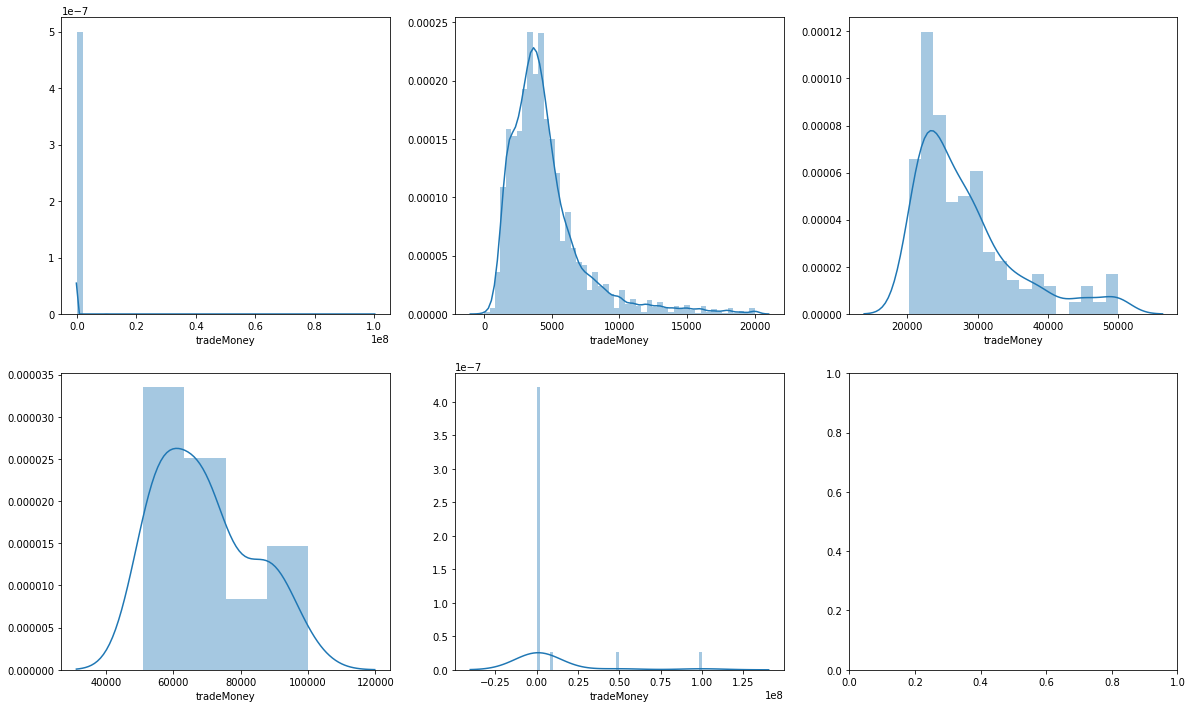

In [13]:
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(df_train['tradeMoney'],ax=axes[0][0])
sns.distplot(df_train[(df_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(df_train[(df_train['tradeMoney']>20000)&(df_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(df_train[(df_train['tradeMoney']>50000)&(df_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(df_train[(df_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

===========了解了标签的分布，我们接下来看一下，训练集和测试集上特征值

In [14]:
for i,name in enumerate(df_train.columns):
    name_sum = df_train[name].value_counts().shape[0]
    print("{:2}、{:15}      The number of types of features is：{}".format(i + 1, name, name_sum))

 1、ID                   The number of types of features is：41440
 2、area                 The number of types of features is：3710
 3、rentType             The number of types of features is：4
 4、houseType            The number of types of features is：104
 5、houseFloor           The number of types of features is：3
 6、totalFloor           The number of types of features is：55
 7、houseToward          The number of types of features is：10
 8、houseDecoration      The number of types of features is：4
 9、communityName        The number of types of features is：4236
10、city                 The number of types of features is：1
11、region               The number of types of features is：15
12、plate                The number of types of features is：66
13、buildYear            The number of types of features is：80
14、saleSecHouseNum      The number of types of features is：28
15、subwayStationNum      The number of types of features is：13
16、busStationNum        The number of types of features is：59
17、

In [15]:
for i,name in enumerate(df_test.columns):
    name_sum = df_test[name].value_counts().shape[0]
    print("{:2}、{:15}      The number of types of features is：{}".format(i + 1, name, name_sum))

 1、ID                   The number of types of features is：2469
 2、area                 The number of types of features is：1264
 3、rentType             The number of types of features is：3
 4、houseType            The number of types of features is：31
 5、houseFloor           The number of types of features is：3
 6、totalFloor           The number of types of features is：39
 7、houseToward          The number of types of features is：8
 8、houseDecoration      The number of types of features is：4
 9、communityName        The number of types of features is：2469
10、city                 The number of types of features is：1
11、region               The number of types of features is：14
12、plate                The number of types of features is：63
13、buildYear            The number of types of features is：67
14、saleSecHouseNum      The number of types of features is：13
15、subwayStationNum      The number of types of features is：13
16、busStationNum        The number of types of features is：56
17、int

city 只有1种，可以去掉

In [35]:
# 区分稠密特征和稀疏特征
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_feature = df_train.columns
drop_feature = ['ID', 'tradeMoney']
dense_feature = []
sparse_feature = []

for i in df_train.columns:
    if i not in drop_feature:
        if df_train[i].dtype in numeric_dtypes:
            dense_feature.append(i)
        else:
            sparse_feature.append(i)

print('Dense feature number of %s' % len(dense_feature))
print('Sparse feature number of %s' % len(sparse_feature))

Dense feature number of 26
Sparse feature number of 23


AttributeError: module 'seaborn' has no attribute 'scatterplot'

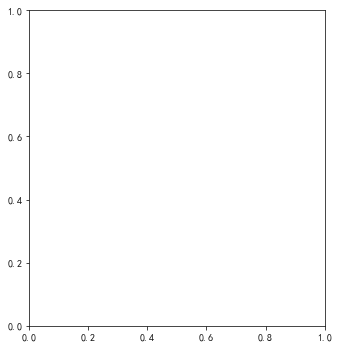

In [40]:
# 绘制稠密特征跟目标变量的散点图
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(18, 180))

for i, feature in enumerate(dense_feature, 1):
    plt.subplot(len(dense_feature), 3, i)
    sns.scatterplot(x=feature, y='tradeMoney', hue='tradeMoney', palette='Blues', data=df_train)

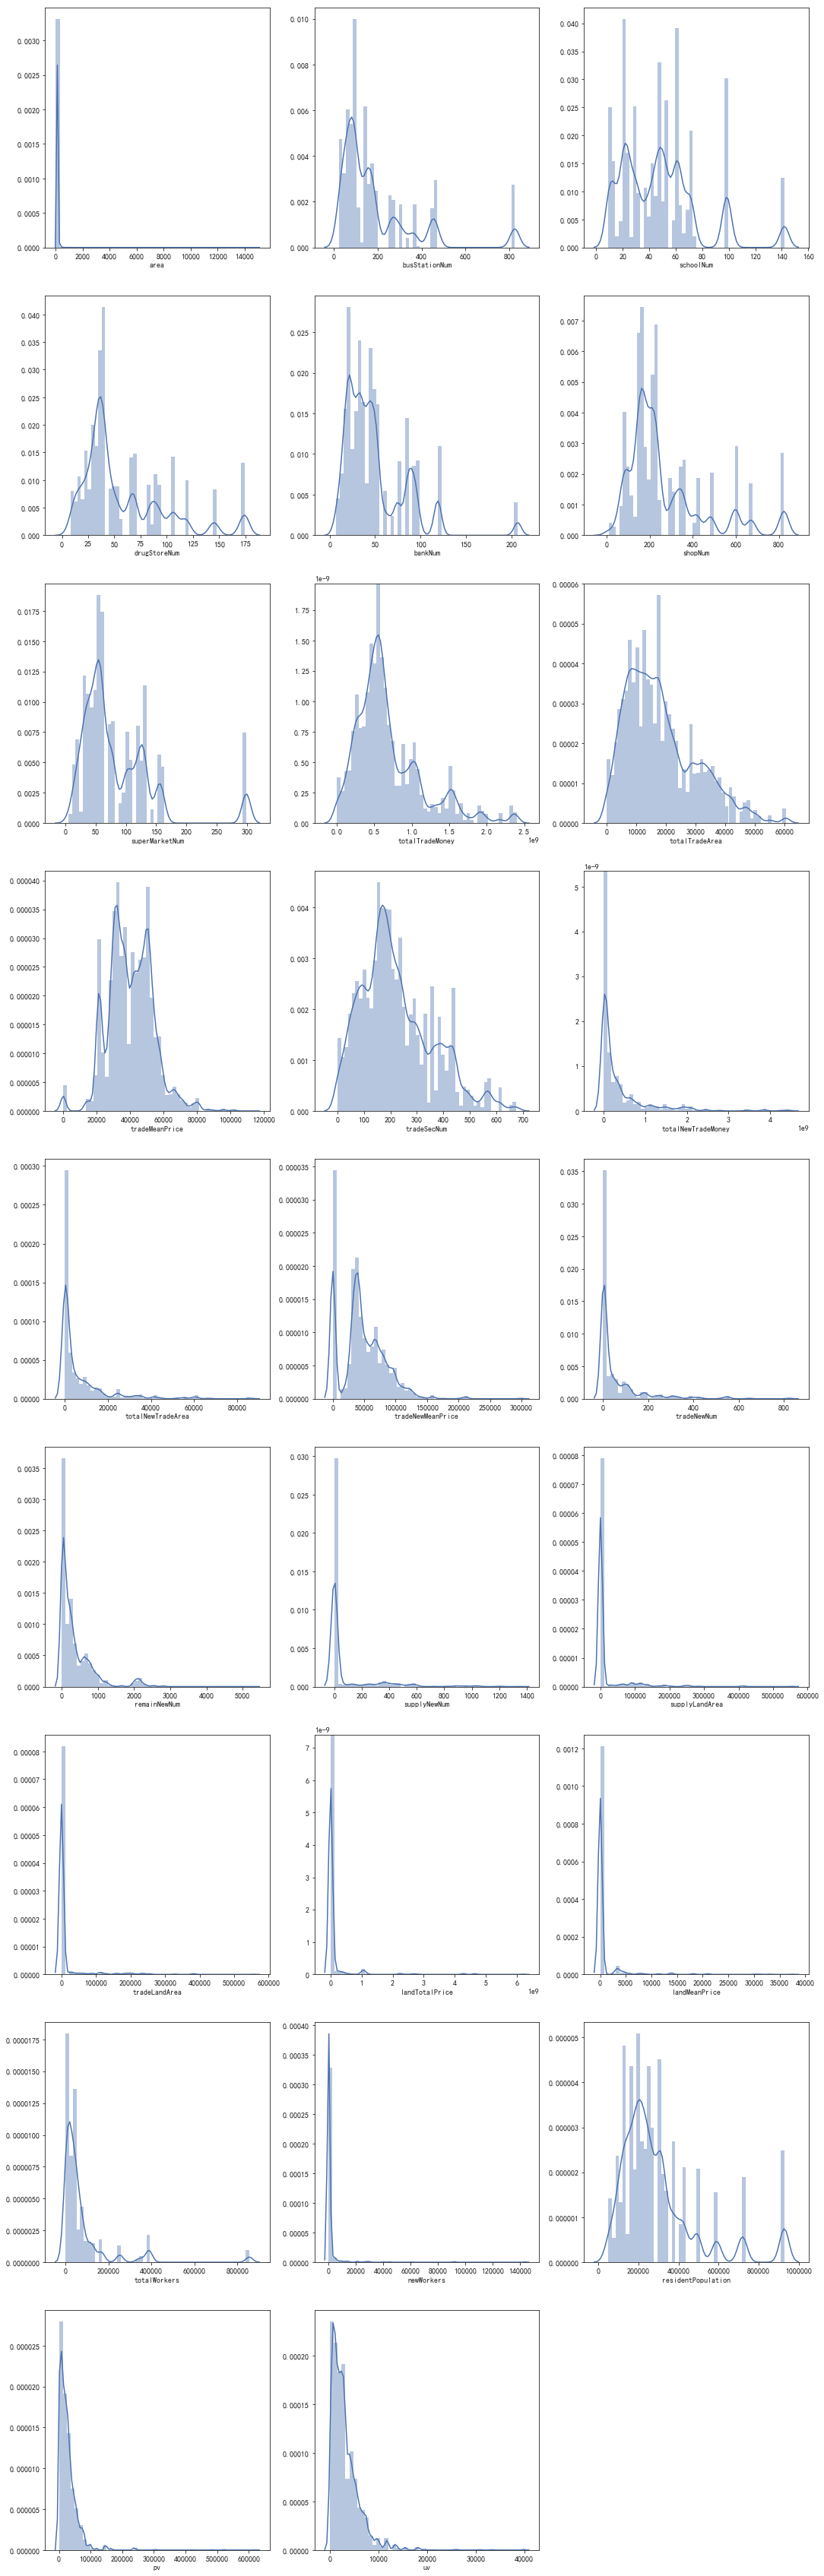

In [37]:
# 绘制稠密特征分布图
# sns.set_style('white')
sns.set_color_codes(palette='deep')
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(18, 180))

for i, feature in enumerate(dense_feature, 1):
    plt.subplot(len(dense_feature), 3, i)
    sns.distplot(df_train[df_train[feature].notnull()][feature], color='b')

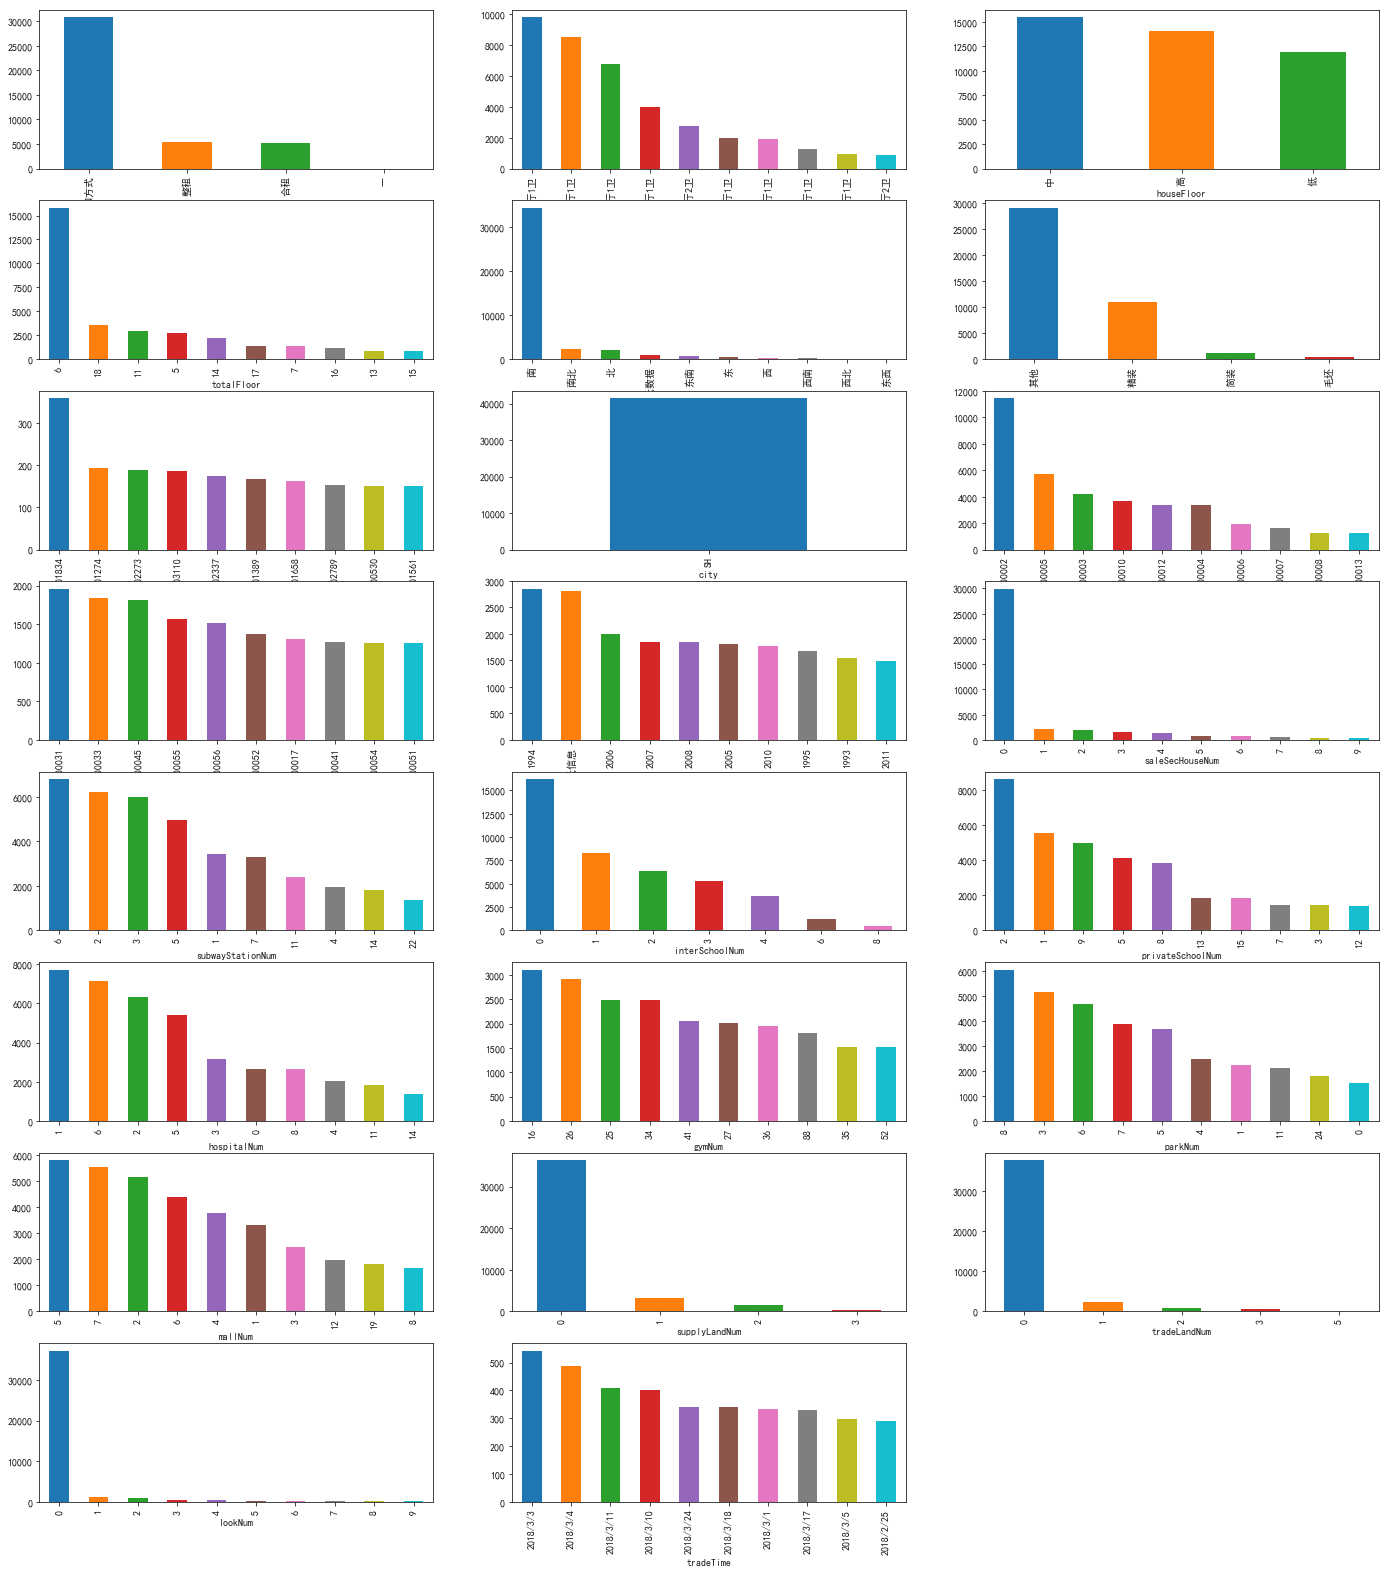

In [41]:
# 绘制稀疏特征分布图，只取最多的10个
f, ax = plt.subplots(ncols=3, nrows=0, figsize=(24, 80))

for i, feature in enumerate(sparse_feature, 1):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.subplot(len(sparse_feature), 3, i)
    df_train[feature].value_counts()[:10].plot.bar()
    plt.xlabel(feature)

### 租赁房源

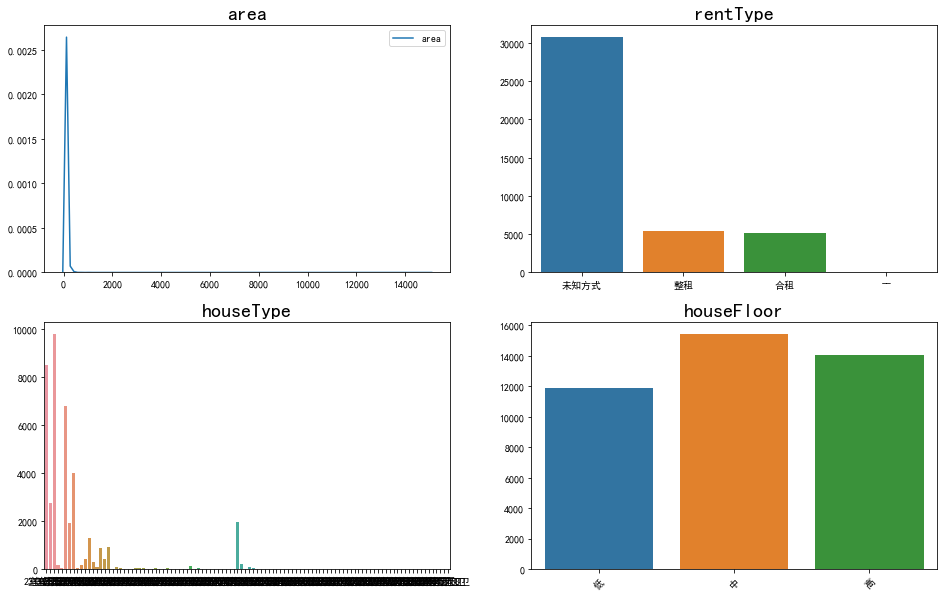

In [16]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(221)
g1=sns.kdeplot(df_train['area'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('area',fontsize=20)

#定义子图2
plt.subplot(222)
g2=sns.countplot(df_train['rentType'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('rentType',fontsize=20)

#定义子图3
plt.subplot(223)
g3=sns.countplot(df_train['houseType'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('houseType',fontsize=20)

#定义子图4
plt.subplot(224)
g4=sns.countplot(df_train['houseFloor'])
g4.set_xlabel('',fontsize=16)
g4.set_ylabel('',fontsize=16)
g4.set_xticklabels(g4.get_xticklabels(),rotation=45)
g4.set_title('houseFloor',fontsize=20)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

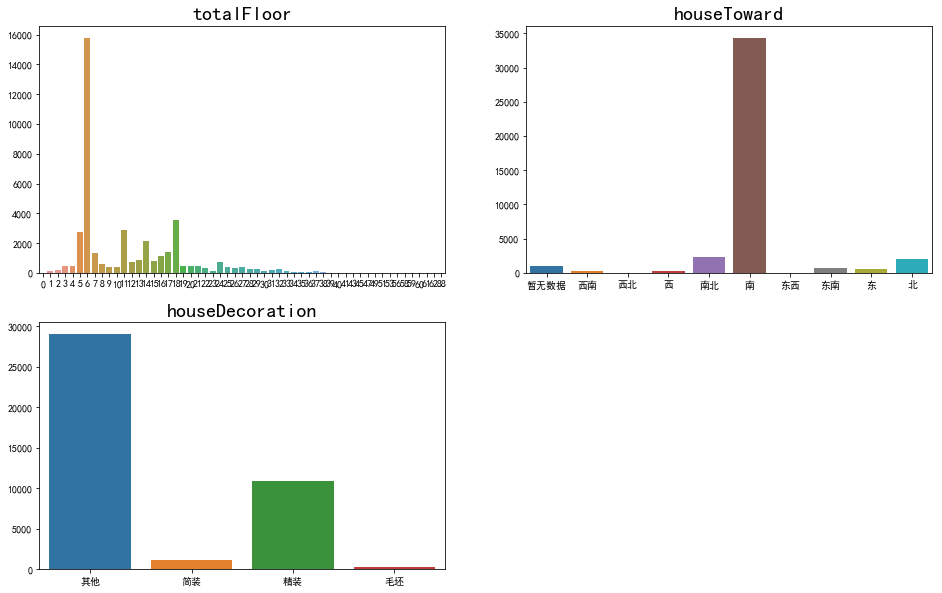

In [17]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(221)
g1=sns.countplot(df_train['totalFloor'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('totalFloor',fontsize=20)

#定义子图2
plt.subplot(222)
g2=sns.countplot(df_train['houseToward'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('houseToward',fontsize=20)

#定义子图3
plt.subplot(223)
g3=sns.countplot(df_train['houseDecoration'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('houseDecoration',fontsize=20)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

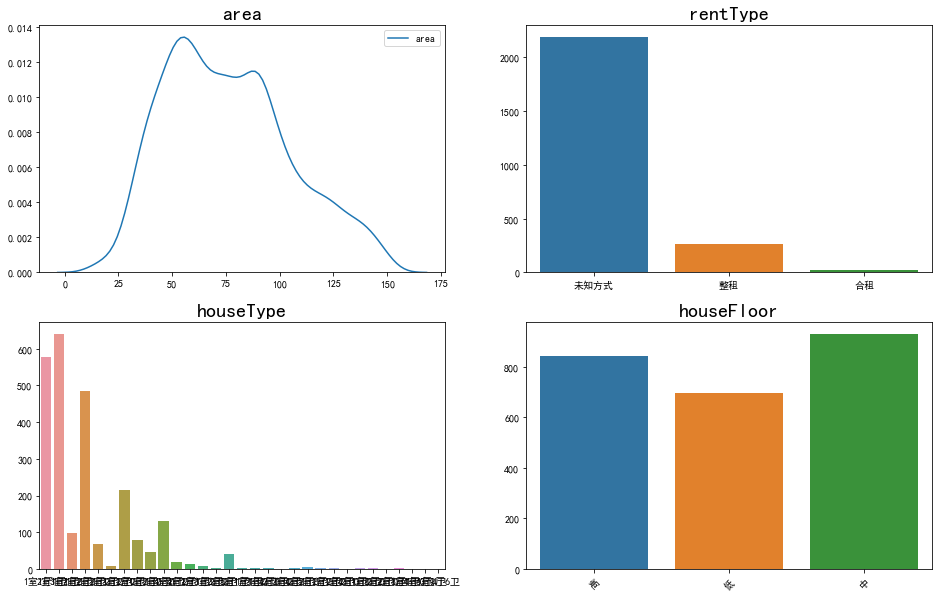

In [18]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(221)
g1=sns.kdeplot(df_test['area'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('area',fontsize=20)

#定义子图2
plt.subplot(222)
g2=sns.countplot(df_test['rentType'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('rentType',fontsize=20)

#定义子图3
plt.subplot(223)
g3=sns.countplot(df_test['houseType'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('houseType',fontsize=20)

#定义子图4
plt.subplot(224)
g4=sns.countplot(df_test['houseFloor'])
g4.set_xlabel('',fontsize=16)
g4.set_ylabel('',fontsize=16)
g4.set_xticklabels(g4.get_xticklabels(),rotation=45)
g4.set_title('houseFloor',fontsize=20)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

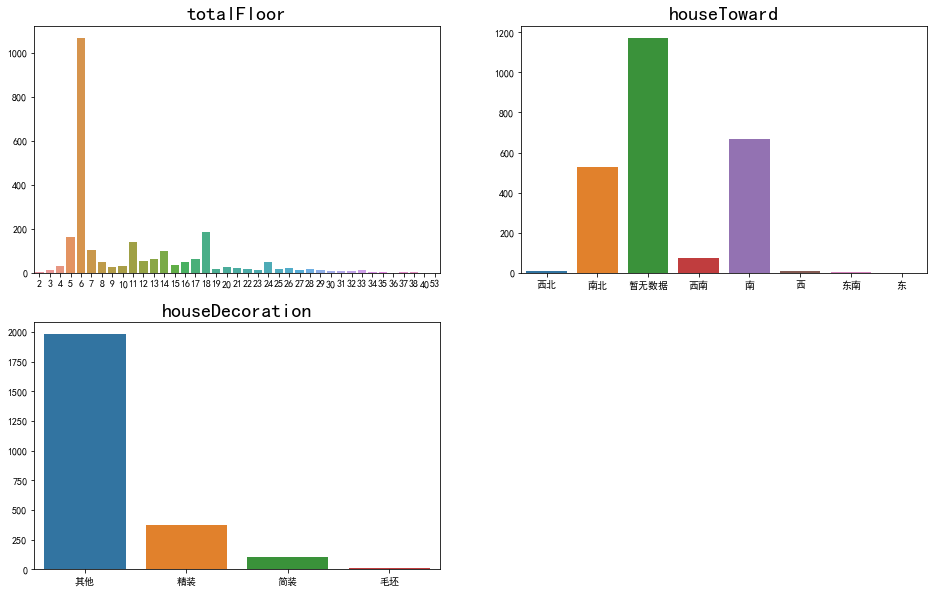

In [19]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(221)
g1=sns.countplot(df_test['totalFloor'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('totalFloor',fontsize=20)

#定义子图2
plt.subplot(222)
g2=sns.countplot(df_test['houseToward'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('houseToward',fontsize=20)

#定义子图3
plt.subplot(223)
g3=sns.countplot(df_test['houseDecoration'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('houseDecoration',fontsize=20)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

### 小区信息

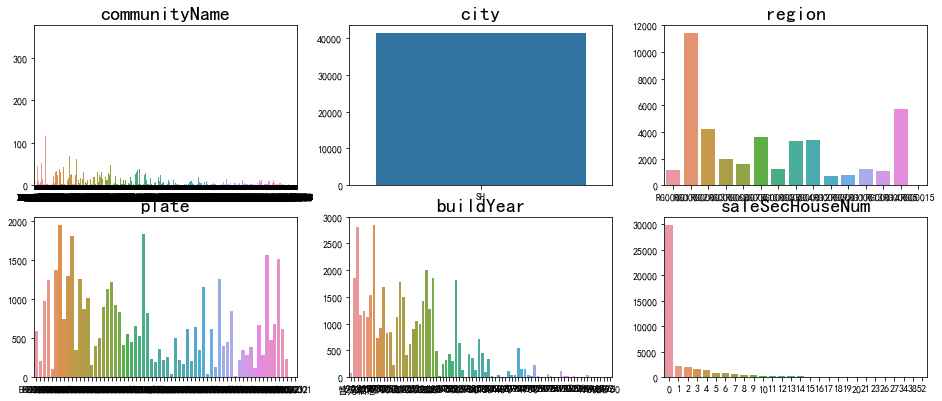

In [32]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(331)
g1=sns.countplot(df_train['communityName'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('communityName',fontsize=20)

#定义子图2
plt.subplot(332)
g2=sns.countplot(df_train['city'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('city',fontsize=20)

#定义子图3
plt.subplot(333)
g3=sns.countplot(df_train['region'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('region',fontsize=20)


plt.subplot(334)
g3=sns.countplot(df_train['plate'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('plate',fontsize=20)

plt.subplot(335)
g3=sns.countplot(df_train['buildYear'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('buildYear',fontsize=20)

plt.subplot(336)
g3=sns.countplot(df_train['saleSecHouseNum'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('saleSecHouseNum',fontsize=20)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

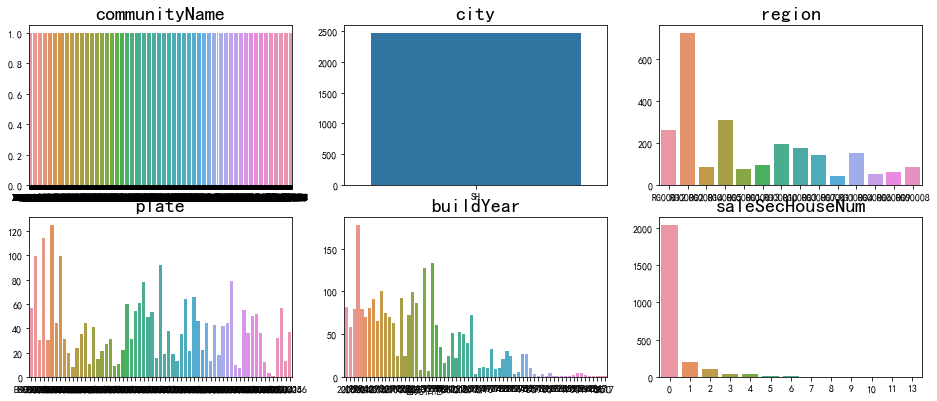

In [31]:
#定义画板
plt.figure(figsize=(16,10))
#定义子图1
plt.subplot(331)
g1=sns.countplot(df_test['communityName'])
g1.set_xlabel('',fontsize=16)
g1.set_ylabel('',fontsize=16)
g1.set_title('communityName',fontsize=20)

#定义子图2
plt.subplot(332)
g2=sns.countplot(df_test['city'])
g2.set_xlabel('',fontsize=16)
g2.set_ylabel('',fontsize=16)
g2.set_title('city',fontsize=20)

#定义子图3
plt.subplot(333)
g3=sns.countplot(df_test['region'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('region',fontsize=20)


plt.subplot(334)
g3=sns.countplot(df_test['plate'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('plate',fontsize=20)

plt.subplot(335)
g3=sns.countplot(df_test['buildYear'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('buildYear',fontsize=20)

plt.subplot(336)
g3=sns.countplot(df_test['saleSecHouseNum'])
g3.set_xlabel('',fontsize=16)
g3.set_ylabel('',fontsize=16)
g3.set_title('saleSecHouseNum',fontsize=20)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号